<a href="https://colab.research.google.com/github/harnalashok/keras/blob/main/pretrained_layers_autoencoder_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 22nd Jan, 2021
# Myfolder: https://github.com/harnalashok/keras
#
# Objectives
#            i)   Building autoencoder using Model class subclassing
#        ==>ii)  Building autoencoder using Functional API   <==
#           iii)  Training autoencoder with gaussian noise added 
#            iv)  Using pre-trained autoencoder layers in a classifier
#             v)  Comparing Classifer performance with and without pre-trained 
#            vi)  Using keras model as a layer
#           vii)  A pre-trained model using autoencoder-with-noise added gives
#                 better classification
#
#
# Ref: https://www.tensorflow.org/tutorials/generative/autoencoder#first_example_basic_autoencoder
#      https://www.tensorflow.org/tutorials/generative/autoencoder#third_example_anomaly_detection
#      Practical Recommendations for Gradient-Based Training of DeepArchitectures by Yoshua Bengio
#      https://www.tensorflow.org/guide/keras/save_and_serialize#saving_loading_only_the_models_weights_values
#

In [140]:
# 1.0 Import libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [141]:
# 1.1 Display outputs from multiple commands in a colab cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [142]:
# 2.0 Get fashion mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Data shape
print (x_train.shape)
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [143]:
# 2.1 Reshape data for feeding it to NN model
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [146]:
# 2.2 Design an Autoencoder with Subclassing
#     We use Functional Model API
#     Encoder has noise added
#     Ref: https://www.tensorflow.org/guide/keras/custom_layers_and_models
#     Page 313, Book: Hands-on Machine Learning witgh Scitkit-Learn, Keras, and Tensorflow

latent_dim = 64 
class Autoencoder(Model):

  # 2.2.1 Design all layers
  def __init__(self, latent_dim, noise_level=0.1):
    super(Autoencoder, self).__init__()

    self.latent_dim = latent_dim
    self.noise_level = noise_level

    # 2.2.2 Define just layers. 
    #layers.Input(shape=(784,))   Inputs will be supplied later
    self.en_ld1 = layers.Dense(self.latent_dim, activation='relu')
    self.en_ld2 = layers.Dense(self.latent_dim, activation='relu')
    self.en_lg  = layers.GaussianNoise(0.1)   # Add some noise
    self.en_ldo = layers.Dense(self.latent_dim, activation='relu', name = "encoder")

    # 2.2.3 This is our decoder
    self.de_ld1 = layers.Dense(self.latent_dim, activation='relu')
    self.de_ld2 = layers.Dense(self.latent_dim, activation='relu')
    self.de_ld3 = layers.Dense(784, activation='sigmoid',name = "decoder")
    #layers.Reshape((28, 28))

  
  # 2.2.4 Call function with just one parameter, inputs    
  def call(self, inputs):
    # 2.3.5: Encoder part
    x = self.en_ld1(inputs)
    x = self.en_ld2(x)
    x = self.en_lg(x)
    encoder = self.en_ldo(x)
    
    # 2.3.6 Decoder part
    y = self.de_ld1(encoder)
    y = self.de_ld2(y)
    decoder = self.de_ld3(y)
    return decoder



In [147]:
# 2.4 Instantiate Autoencoder
autoencoder  = Autoencoder(100, 0.1)
# 2.4.1 Input layer
inputs = layers.Input(shape = x_train.shape[1])
# 2.4.2 Create model
out_decoder = autoencoder(inputs)            
model = Model(inputs = inputs, outputs = out_decoder)

In [148]:
# 2.5 Summaries of two models/classes
print("Model summary")
print("=============")

# 2.5.1
model.summary()
print("\n\nAutoencoder summary--Full details of inner layers")
print("==================================================")

autoencoder.summary()

Model summary
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
autoencoder_24 (Autoencoder) (None, 784)               198084    
Total params: 198,084
Trainable params: 198,084
Non-trainable params: 0
_________________________________________________________________


Autoencoder summary--Full details of inner layers
Model: "autoencoder_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_146 (Dense)            multiple                  78500     
_________________________________________________________________
dense_147 (Dense)            multiple                  10100     
_________________________________________________________________
gaussian_noise_17 (GaussianN 

Main Model plot


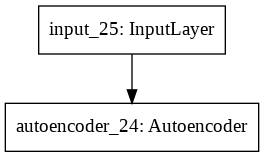



Autoencoder plot--No inner layers seen



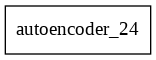

In [151]:
# 2.5.2
print("Main Model plot")
plot_model(model)
# Printing autoencoder plot
# does not show inner layers
print("\n\nAutoencoder plot--No inner layers seen\n")
plot_model(autoencoder)

In [152]:
# 3.0 Instantiate, compile and train autoencoder
model.compile(optimizer='adam', loss="mse")
model.fit(x_train, x_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, x_test)
                )


Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0386 - val_loss: 0.0175
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0167 - val_loss: 0.0146
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0144 - val_loss: 0.0133
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0122 - val_loss: 0.0117
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 8/100
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 9/100
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - l

In [156]:
# 3.2 Just look at autoencoder layers
#     and their names
autoencoder.layers
print("\n\nNamed Autoencoder Layers:")
print("==================")
for layer in autoencoder.layers:
    print (layer.name)

print("\n\nName of 3rd autoencoder layer:")
print("===========================")
autoencoder.layers[3].name



Named Autoencoder Layers:
dense_146
dense_147
gaussian_noise_17
encoder
dense_148
dense_149
decoder


Name of 3rd autoencoder layer:


'encoder'

In [157]:
# 4.0 Design an Autoencoder with Subclassing
#     BUT Encoder has NO noise added

latent_dim = 64 
class Autoencoder_n(Model):

  # 4.1 Design all layers
  def __init__(self, latent_dim):
    super(Autoencoder_n, self).__init__()
    self.latent_dim = latent_dim
    
    # 4.2 Define layers. 
    #layers.Input(shape=(784,)),
    self.en_ld1 = layers.Dense(self.latent_dim, activation='relu')
    self.en_ld2 = layers.Dense(self.latent_dim, activation='relu')
    #self.en_lg  = layers.GaussianNoise(0.1)   # Add some noise
    self.en_ldo = layers.Dense(self.latent_dim, activation='relu', name = "encoder")

    # 4.3 This is our decoder
    self.de_ld1 = layers.Dense(self.latent_dim, activation='relu')
    self.de_ld2 = layers.Dense(self.latent_dim, activation='relu')
    self.de_ld3 = layers.Dense(784, activation='sigmoid',name = "decoder")
    #layers.Reshape((28, 28))

  
  # 4.4 Call function with just one parameter    
  def call(self, inputs):
    x = self.en_ld1(inputs)
    x = self.en_ld2(x)
    #x = self.en_lg(x)
    encoder = self.en_ldo(x)

    y = self.de_ld1(encoder)
    y = self.de_ld2(y)
    decoder = self.de_ld3(y)
    return decoder

In [158]:
# 5.0 As our model has been built using subclassing API,
#     to intantiate the model, we have to fit it.
#     Of course, this training is of no use as we will
#     soon replace the encoder weights by the learned weights
#     of earlier autoencoder

autoencoder_n = Autoencoder_n(100)
autoencoder_n.compile(optimizer='adam', loss="mse")
autoencoder_n.fit(x_train, x_train,
                epochs= 3,      # No need to increase it
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0381 - val_loss: 0.0173
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0162 - val_loss: 0.0140
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - val_loss: 0.0128


In [159]:
# 5.1 Names of layers in autoencoder_n
for layer in autoencoder_n.layers:
  print(layer.name)

# 5.2 And 'encoder' layer  
print("\n")
autoencoder_n.layers[2].name  

dense_150
dense_151
encoder
dense_152
dense_153
decoder




'encoder'

In [160]:
# 5.3 Just experimenting
autoencoder.layers[4].get_weights()[0].shape
autoencoder.layers[3].get_weights()[0].shape
autoencoder.layers[1].get_weights()[0].shape
autoencoder.layers[0].get_weights()[0].shape


(100, 100)

(100, 100)

(100, 100)

(784, 100)

In [161]:
# 5.4 Replace 'encoder' weights of autoencoder_n
#     with those in trained autoencoder
#     Note that autoencoder.layers[2] is GaussianNoise layer

autoencoder_n.layers[0].set_weights(autoencoder.layers[0].get_weights())
autoencoder_n.layers[1].set_weights(autoencoder.layers[1].get_weights())
# autoencoder_n.layers[2].set_weights(autoencoder.layers[2].get_weights())
autoencoder_n.layers[2].set_weights(autoencoder.layers[3].get_weights())


In [162]:
# 6.0 So now we have two autoencoders. One which was trained with noise added
#     to input. And the other whose 'encoder' has the same weights as of earlier
#     autoencoder. BUT this autoencoder does NOT have, so-to-say GaussianNoise layer.

# Classification
Using autoencoder pre-trained weights while performing classification

In [163]:
# 7.0 Define our Classification model
#     We use pretrained layers of autoencoder
def class_model(trainable = False):
  # 7.1
  inputs = layers.Input(shape = x_train.shape[1:])
  # 7.2 Encoder part of autoencoder
  x = autoencoder_n.layers[0](inputs)
  x = autoencoder_n.layers[1](x)
  x = autoencoder_n.layers[2](x)
  # 7.3 Output layer
  x = layers.Dense(10,activation = "softmax")(x)
  # 7.4 Our model
  model1 = Model(inputs = [inputs], outputs = [x])
  # 7.5 Should encoder be trainable or not?
  for layer in range(4):
    model1.layers[layer].trainable = trainable
  return model1  


In [164]:
# 8.0 Instantiate classification model and train it
#     Encoder weights will not be 'trained/changed'
model1 = class_model(False)
# 8.1
model1.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
# 8.2
model1.fit(x_train, y_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, y_test)
                )

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3633 - accuracy: 0.5828 - val_loss: 0.5181 - val_accuracy: 0.8196
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4873 - accuracy: 0.8277 - val_loss: 0.4933 - val_accuracy: 0.8236
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4498 - accuracy: 0.8411 - val_loss: 0.4917 - val_accuracy: 0.8256
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4440 - accuracy: 0.8433 - val_loss: 0.4891 - val_accuracy: 0.8346
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4368 - accuracy: 0.8481 - val_loss: 0.4704 - val_accuracy: 0.8353
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4409 - accuracy: 0.8472 - val_loss: 0.4799 - val_accuracy: 0.8361
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4348 - accuracy: 0.8488 - val_loss: 0.4725 - val_ac

In [165]:
# 8.3 Evaluate model
model1.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.8381


[0.5156015157699585, 0.838100016117096]

In [166]:
# 8.4 Also get its summary
model1.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_150 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_151 (Dense)            (None, 100)               10100     
_________________________________________________________________
encoder (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_154 (Dense)            (None, 10)                1010      
Total params: 99,710
Trainable params: 1,010
Non-trainable params: 98,700
_________________________________________________________________


In [167]:
# 9.0 Run the classification model again but 
#     this time train the 'encoder' part of
#     classification layer also

model2 = class_model(True)
# 9.1
model2.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
# 9.2
model2.fit(x_train, y_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, y_test)
                )

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6605 - accuracy: 0.7784 - val_loss: 0.4396 - val_accuracy: 0.8471
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3782 - accuracy: 0.8641 - val_loss: 0.4063 - val_accuracy: 0.8664
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3529 - accuracy: 0.8771 - val_loss: 0.4246 - val_accuracy: 0.8510
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3513 - accuracy: 0.8755 - val_loss: 0.4409 - val_accuracy: 0.8620
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3508 - accuracy: 0.8799 - val_loss: 0.4279 - val_accuracy: 0.8646
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3462 - accuracy: 0.8797 - val_loss: 0.4681 - val_accuracy: 0.8592
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3453 - accuracy: 0.8837 - val_loss: 0.4872 - val_ac

In [168]:
# 9.3 Evaluate the model
#    Observe that a pre-trained model using
#    autoencoder gives better classification
model2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 3.0304 - accuracy: 0.8465


[3.03037166595459, 0.8464999794960022]

In [169]:
# 10.0 If you evaluate model1 again, we get very low accuracy
#     as autoencoder weights have changed
model1.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 154.6052 - accuracy: 0.1952


[154.60516357421875, 0.19519999623298645]

In [ ]:
########## I am done ##########